In [4]:
def compute_loss(y, y_hat): 
    return ((y - y_hat) ** 2) / 2

In [12]:
# Housing pricing prediction
import numpy as np
from sklearn.datasets import load_boston 
boston = load_boston() 
X = boston.data 
y = boston.target 
print(len(y))
y_hat = np.array([y.mean()]*len(y)) 
#print(y_hat)
compute_loss(y, y_hat).mean()

506


42.20977807808278

In [10]:
# Pseudo- Residuals
# calculate the gradient of your loss function with respect to your predicted values
# target inputs to a weak learner
# the gradient is another word for the slope of a line
compute_loss(y[0], y_hat[0])

1.076328641284812

In [19]:
import matplotlib.pyplot as plt

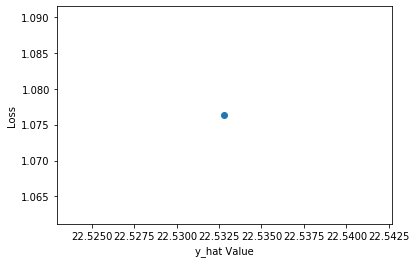

In [21]:
plt.scatter(y_hat[0], compute_loss(y[0], y_hat[0])) 
plt.xlabel('y_hat Value') 
plt.ylabel('Loss') 
plt.show()

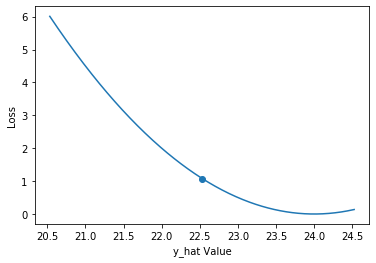

In [26]:
# train our model on -1 * the gradient at this point of the loss function line
losses = [] 
for i in range(-200, 200): 
    losses.append(compute_loss(y[0], y_hat[0]+i/100))
plt.plot(y_hat[0] + np.arange(-2, 2, .01), losses, zorder=1) 
plt.scatter(y_hat[0], compute_loss(y[0], y_hat[0]), zorder=2)
plt.xlabel('y_hat Value') 
plt.ylabel('Loss') 
plt.show()

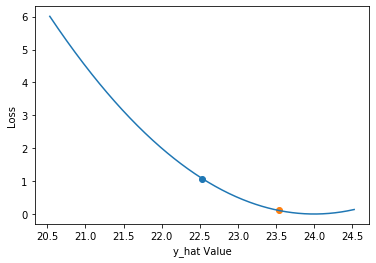

In [31]:
# divide the change in the loss by the change in y_hat. So let’s add another y_hat point to the line
plt.plot(y_hat[0] + np.arange(-2, 2, .01), losses, zorder=1) 
plt.scatter(y_hat[0], compute_loss(y[0], y_hat[0]), zorder=2) 
plt.scatter(y_hat[0]+1, compute_loss(y[0], y_hat[0]+1)) 
plt.xlabel('y_hat Value') 
plt.ylabel('Loss') 
plt.show()

In [32]:
# Gradient = Change in loss / Change in y_hat 
(compute_loss(y[0], y_hat[0]+1) - compute_loss(y[0], y_hat[0])) / 1

-0.9671936758893231

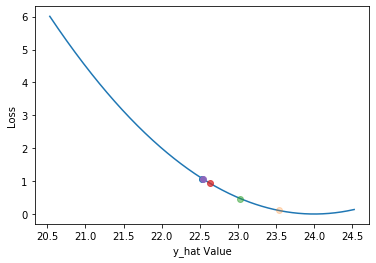

In [33]:
plt.plot(y_hat[0] + np.arange(-2, 2, .01), losses, zorder=1) 
plt.scatter(y_hat[0], compute_loss(y[0], y_hat[0]), zorder=2) 
plt.scatter(y_hat[0]+1, compute_loss(y[0], y_hat[0]+1), zorder=3, alpha=.25) 
plt.scatter(y_hat[0]+.5, compute_loss(y[0], y_hat[0]+.5), zorder=3, alpha=.5) 
plt.scatter(y_hat[0]+.1, compute_loss(y[0], y_hat[0]+.1), zorder=3, alpha=.75) 
plt.scatter(y_hat[0]+.01, compute_loss(y[0], y_hat[0]+.01), zorder=3, alpha=.9) 
plt.xlabel('y_hat Value') 
plt.ylabel('Loss') 
plt.show()

In [36]:
# gradient value seems to be approaching a specific value
# Gradient = Change in loss / Change in y_hat 
(compute_loss(y[0], y_hat[0]+1) - compute_loss(y[0], y_hat[0])) / 1
(compute_loss(y[0], y_hat[0]+.5) - compute_loss(y[0], y_hat[0])) / .5 
(compute_loss(y[0], y_hat[0]+.1) - compute_loss(y[0], y_hat[0])) / .1 
(compute_loss(y[0], y_hat[0]+.01) - compute_loss(y[0], y_hat[0])) / .01 

-1.462193675889556

In [38]:
def loss_gradient(y, y_hat): 
    return -(y-y_hat) 
residuals = -loss_gradient(y, y_hat)

In [40]:
#residuals

In [41]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(max_depth=1) 
regressor.fit(X, residuals)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [42]:
regressor.tree_.feature

array([ 5, -2, -2], dtype=int64)

In [43]:
regressor.tree_.threshold

array([ 6.94099998, -2.        , -2.        ])

In [44]:
leaf1_index = np.where(X[:,5] >= 6.94099998) 
leaf2_index = np.where(X[:,5] < 6.94099998)

In [45]:
# means of these leaves
leaf1_output = residuals[leaf1_index].mean() 
leaf2_output = residuals[leaf2_index].mean()

In [46]:
# calculate the loss using this split
compute_loss(residuals, [ leaf1_output if ix in list(leaf1_index)[0] else leaf2_output for ix in range(len(X))]).mean() 

23.09954583855424